# Modelación Computacional de Sistemas Complejos.
## Temas Selectos de Física Computacional I

### Sergio A. Alcalá Corona 
### Sergio A. Sánchez Chávez

---
---

# 3. Caos Determinista en Sistemas Dinámicos

Importamos las bibiotecas necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
from ipywidgets import *

from pylab import *

Definimos nuestra función para **integrar numericamente** las ecuaciones diferenciales que definan a nuestro sistema dinámico.

In [2]:
def EulerND(f,x0,t0,tf,dt,params):
        
    T=[]
    X=[]

    for i in range(len(x0)):
        a = []
        X.append(a)
        X[i].append(x0[i])

    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,params)*dt
        t = t + dt
        for i in range(len(x0)):
            X[i].append(x[i])
        T.append(t)

    return X,T


## 3.1 Caos Determinista en Sistemas Dinámicos Continuos

### El sistema de Lorenz

El conocido **Sistema de Lorenz** propuesto en 1963 por Edward Lorenz con ayuda de Ellen Fetter. Y fue desarrollado, como un módelo matemático simplificado para el estudio de la convección astmosferica. Está definidio por la 3 siguientes ecuaciones diferenciales ordinarias:

$\dot{x} = \sigma (y - x)$ 

$\dot{y} = rx - y - xz $

$\dot{z} = xy - bz $

Dichas ecuaciones relacionan las propiedades de una capa de fluido bidimensional que se calienta uniformemente desde abajo y se enfría desde arriba y describen la tasa de cambio de tres cantidades con respecto al tiempo: 

$x(t)$ la tasa de convección, 

$y(t)$ a la variación de temperatura horizontal y 

$z(t)$ a la variación de temperatura vertical. 

Las constantes $r, \sigma, b > 0$, son parámetros del sistema. Donde $\sigma$ es el **número de Prandtl**, $r$ es el **número de Rayleigh** y el parametro $b$ está relacionado con aspectos de convección.

Para profundizar en la física de este sistmea consulte el libro de **Strogatz Capitulo 9**. Secciones *9.0 a 9.2*.

#### Es claro que el sistema es no lineal dados los terminos $xz$ para $\dot{y}$ y $xy$ para $\dot{z}$.





Como vimos en clase, el **Sistema de Lorenz** presenta 3 *puntos de equilbrio* en genral:

$C_0 = \left( 0,0,0 \right) \;$   el origen y 

$C^+ = \left( \sqrt{(b(r-1))},\sqrt{(b(r-1))},(r-1) \right)$

$C^- = \left( -\sqrt{(b(r-1))},-\sqrt{(b(r-1))},(r-1) \right)$

Que corresponden a las dos soluciones de la ecuación cuadratica resultante.

Analicemos computacionalmente el **Sistema de Lorenz** y sus *puntos de equilibrio* en el espacio fase.

Para esto, definamos la función de `lorenz()` que integramos con nuestra función `EulerND`.

In [3]:
def lorenz(x, params):
    
    s = params[0]
    r = params[1]
    b = params[2]
    
    y = array(zeros(3))
    
    y[0] = s*(x[1] - x[0])
    y[1] = r*x[0] - x[1] - x[0]*x[2]
    y[2] = x[0]*x[1] - b*x[2]
    
    return y


Definamos también un par de funciones para graficar los *puntos de equlibrio* y el **Espacio Fase** del sistema.

In [4]:
def PtosEquilibrio(s,r,b):    
    
    x = np.sqrt(b*(r-1))
    y = x
    z = (r-1)    
        
    C0 = np.array([0,0,0])
    C1 = np.array([x,y,z])
    C2 = np.array([-x,-y,z])        
               
    return C0,C1,C2
    


def PtosEquilibrioPlot(s,r,b,dim):    
    
    x = np.sqrt(b*(r-1))
    y = x
    z = (r-1)
    
    if (dim == '3D'):
        
        C0 = np.array([0,0,0])
        C1 =  np.array([x,y,z])
        C2 =  np.array([-x,-y,z])        
        
        plt.plot(0,0,0, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(0,0,0,'$C_0$')    
        plt.plot(x,y,z, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(x,y,z,'$C^+$')
        plt.plot(-x,-y,z, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(-x,-y,z,'$C^-$')
        
        return C0,C1,C2
        
    elif (dim == 'XY'):
        
        C0 = np.array([0,0])
        C1 =  np.array([x,y])
        C2 =  np.array([-x,-y])           
        
        plt.plot(0,0, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(0,0,'$C_0$')    
        plt.plot(x,y, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(x,y,'$C^+$')
        plt.plot(-x,-y, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(-x,-y,'$C^-$')
        
        return C0,C1,C2

        
    elif (dim == 'XZ'):
        
        C0 = np.array([0,0])
        C1 =  np.array([x,z])
        C2 =  np.array([-x,z])          
        
        plt.plot(0,0, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(0,0,'$C_0$')    
        plt.plot(x,z, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(x,z,'$C^+$')
        plt.plot(-x,z, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(-x,z,'$C^-$')
        
        return C0,C1,C2
        
    elif (dim == 'YZ'):
        
        C0 = np.array([0,0])
        C1 =  np.array([y,z])
        C2 =  np.array([-y,z])          
        
        plt.plot(0,0, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(0,0,'$C_0$')    
        plt.plot(y,z, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(y,z,'$C^+$')
        plt.plot(-y,z, markerfacecolor='b', markeredgecolor='b', marker='o', markersize=5, alpha=1)
        ax.text(-y,z,'$C^-$')
        
        return C0,C1,C2
        
    
    


def EspacioFaseLorenz(f,x0,clr,t0,tf,dt,params):    
    
    Datos = EulerND(lorenz,x0,t0,tf,dt,params)    

    plt.plot(Datos[0][0],Datos[0][1],Datos[0][2], color=clr)
    plt.plot([x0[0]], [x0[1]], [x0[2]], markerfacecolor=clr, marker='o', markersize=5, alpha=1)
    
    
    PtosEquilibrioPlot(params[0],params[1],params[2],'3D')

In [5]:
# Primero definamos algunas condiciones iniciales que podemos usar para explorar el sistema:

x0 = array([0.01,0.01,0.01]) # Una my cercana al origen
x1 = array([0,5,10]) 
x2 = array([0.1,5.1,10.1])  # x1 y x2, seran dos condicones inicales muy cercanas entre si.
x3 = array([22,14,30]) 

<IPython.core.display.Javascript object>


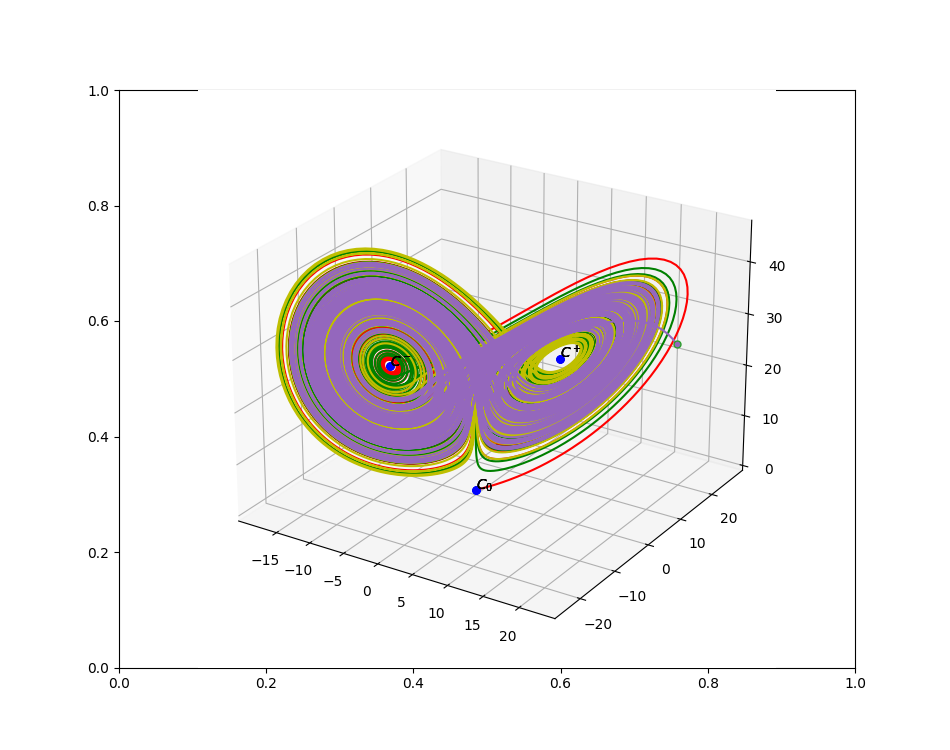

interactive(children=(FloatSlider(value=10.0, description='s', max=50.0), FloatSlider(value=13.0, description=…

In [6]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax = fig.add_subplot(111, projection='3d')

@widgets.interact(s=(0, 50, 0.1),r=(0, 70 ,0.01), b=(0, 10, 0.01))

def update(s=10, r=13, b=float(8)/float(3)):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    
    params = np.array([s,r,b])
    dt=0.005  # paso de integracion numerica
    
    EspacioFaseLorenz(lorenz,x0,'r',0,100,dt,params)
    EspacioFaseLorenz(lorenz,x1,'g',0,100,dt,params)
    EspacioFaseLorenz(lorenz,x2,'y',0,100,dt,params)
    EspacioFaseLorenz(lorenz,x3,'tab:purple',0,100,dt,params)
    
    rH = float(s*(s+b+3))/float(s-b-1)
    print("rH = ",rH)



Si $0 < r < 1$, el origen ($C_0$) es el único *punto de equilibrio*, dado que $C^+$ y $C^-$ se vuelven *imaginarios*. Así, para este rango de $r$, $C_0$ corresponde a un *atractor global*. Es decir, todas las órbitas convergen al origen; por lo que el sistema no muestra ninguna convección. 

Lorenz estudió el caso particular para $\sigma = 10$ y $b = \frac{8}{3}$ y $r = 28$ , por lo que es común asumir dichos valores para esos parametros, cuando se estudia el sistema. El cual exhibe un comportamiento **caótico** para estos valores (y los cercanos).

En $r = 1$, se produce una **bifurcación de tridente o trinche** en inglés *pitchfork bifurcation* (vease la sección **3.4** del libro de **S. Strogatz**). 

Y a partir de  $r > 1$, aparecen $C^+$ y $C^-$. Estos *puntos de quilibrio* corresponden a convección constante y son de naturaleza estable para:

$1 < r < r_H = \dfrac{\sigma(\sigma + b + 3)}{\sigma - b - 1}$

y que solo es válido para $\sigma > b + 1$ (dado el denominador).

En el valor crítico $r = r_H$, $C^+$ y $C^-$ pierden estabilidad, en lo que se conoce como una **bifurcación de Hopf** *subcrítica* (vease la sección **8.2** del libro de **S. Strogatz**). Donde un **cilclo limite inestable** (alrededor de un *punto de equilbrio* **estable**) se convierte en un **punto de equilibrio inestable**.
Por eso se usa el subinidice $H$. 

#### Por lo que para $r > r_H$, no existe ningún atracator en el sistema. Entonces: ¿a dónde van las trayectorias en el espacio fase?


**Nota:** Para profudizar en el tema de **Bifurcaciones** consulte el **Cápitulo 3** del libro de **S. Strogatz**.

La siguiente figura (*Figura 9.2.5 del Strogatz*), muestra in diagrama de bifurcación parcial del comportamiento de la estabilidad de los puntos de equilibrio del sistema para $1 < r < r_H$ y un poco más allá. 

<!-- ![Strogatz9.2.5.png](attachment:Strogatz9.2.5.png) -->
<img src="img/Strogatz9.2.5.png" width="700">

#### Ahora veamos si las series de tiempo del sistema, nos dicen algo:

<IPython.core.display.Javascript object>


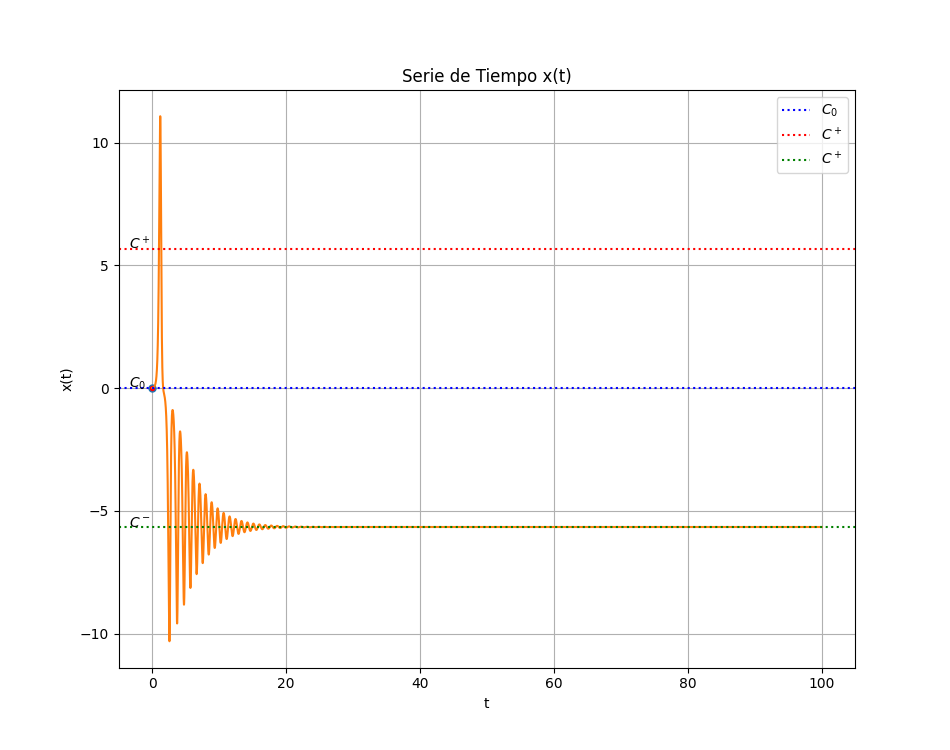

interactive(children=(FloatSlider(value=10.0, description='s', max=50.0), FloatSlider(value=13.0, description=…

In [8]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

@widgets.interact(s=(0, 50, 0.1),r=(0, 40 ,0.01), b=(0, 10, 0.01),variable=['X','Y','Z'],CondIni=['x0', 'x1', 'x2', 'x3'],n=(2, 1000, 1.))

def update(s=10, r=13, b=float(8)/float(3),variable='X',CondIni='x0', n = 100):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)        
        
    params = np.array([s,r,b])
    dt=0.005  # paso de integracion numerica

    if (CondIni=='x0'):
        xc=x0        
    elif (CondIni=='x1'):
        xc=x1
    elif (CondIni=='x2'):
        xc=x2
    elif (CondIni=='x3'):
        xc=x3        
        

    X,T = EulerND(lorenz,xc,0,n,dt,params)
    
    C0,C1,C2 = PtosEquilibrio(s,r,b)


    if (variable=='X'):        
        plt.plot([T[0]], [xc[0]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.plot(T,X[0])
        plt.title("Serie de Tiempo x(t)")
        plt.xlabel('t')
        plt.ylabel('x(t)')
        plt.axhline(C0[0], linestyle=':', color='blue', label=r'$C_0$')
        ax.text(-3.5,C0[0],r'$C_0$')  
        plt.axhline(C1[0], linestyle=':', color='red', label=r'$C^+$')
        ax.text(-3.5,C1[0],r'$C^+$')  
        plt.axhline(C2[0], linestyle=':', color='green', label=r'$C^+$')
        ax.text(-3.5,C2[0],r'$C^-$')  
    elif (variable=='Y'):
        plt.plot([T[0]], [xc[1]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.plot(T,X[1])
        plt.title("Serie de Tiempo y(t)")
        plt.xlabel('t')
        plt.ylabel('y(t)')
        plt.axhline(C0[1], linestyle=':', color='blue', label=r'$C_0$')
        ax.text(-3.5,C0[1],r'$C_0$')  
        plt.axhline(C1[1], linestyle=':', color='red', label=r'$C^+$')
        ax.text(-3.5,C1[1],r'$C^+$')  
        plt.axhline(C2[1], linestyle=':', color='green', label=r'$C^+$')
        ax.text(-3.5,C2[1],r'$C^-$')  
    elif (variable=='Z'):
        plt.plot([T[0]], [xc[2]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.plot(T,X[2])
        plt.title("Serie de Tiempo z(t)")
        plt.xlabel('t')
        plt.ylabel('z(t)')
        plt.axhline(C0[2], linestyle=':', color='blue', label=r'$C_0$')
        ax.text(-3.5,C0[2],r'$C_0$')  
        plt.axhline(C1[2], linestyle=':', color='red', label=r'$C^+$')
        ax.text(-3.5,C1[2],r'$C^+$')  
        plt.axhline(C2[2], linestyle=':', color='green', label=r'$C^+$')
        ax.text(-3.5,C2[2],r'$C^-$')  
        
        
        
    rH = float(s*(s+b+3))/float(s-b-1)
    print("rH = ",rH)
    plt.legend()


Para $r > r_H$, despues de tiempo de transición inicial, la soluciones paracen estabilizarse en una oscilación irregular que persiste para $t \rightarrow \infty$. Dichas oscilaciones son **aperiodicas**.

Ahora veamos las proyecciones del *Espacio Fase* en los tres **planos fase** que tiene el sistema:

<IPython.core.display.Javascript object>


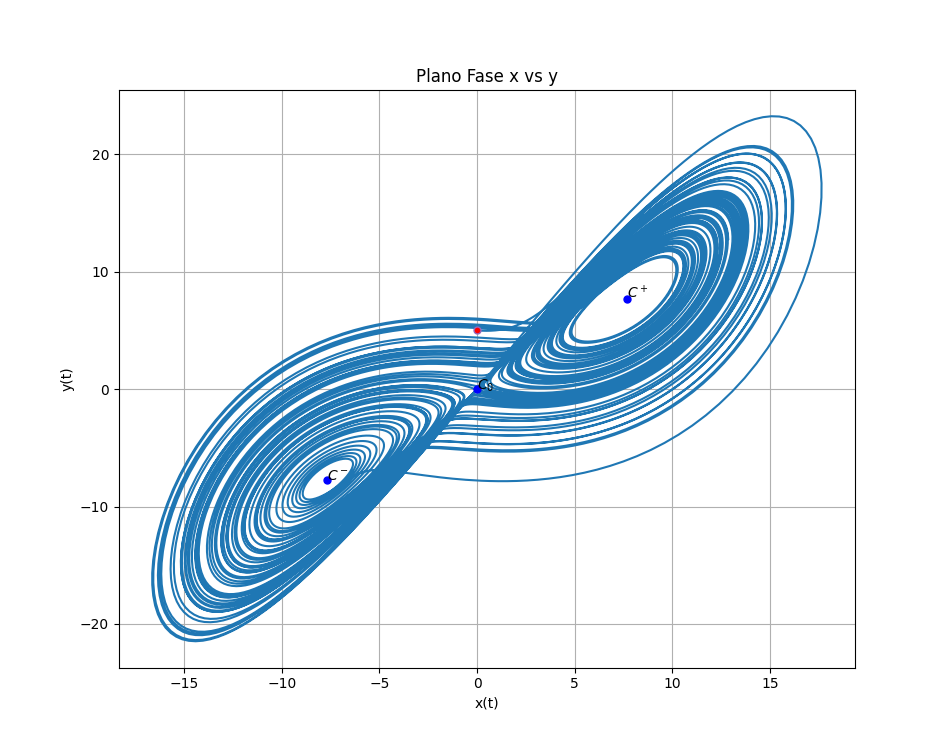

interactive(children=(FloatSlider(value=10.0, description='s', max=50.0), FloatSlider(value=13.0, description=…

In [9]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


@widgets.interact(s=(0, 50, 0.1),r=(0, 40 ,0.01), b=(0, 10, 0.01),Plano=['XY','XZ','YZ'],CondIni=['x0', 'x1', 'x2', 'x3'])

def update(s=10, r=13, b=float(8)/float(3),Plano='XY',CondIni='x0'):

    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)
        
    params = np.array([s,r,b])
    dt=0.005  # paso de integracion numerica
    
    if (CondIni=='x0'):
        xc=x0        
    elif (CondIni=='x1'):
        xc=x1
    elif (CondIni=='x2'):
        xc=x2
    elif (CondIni=='x3'):
        xc=x3        
        
    X,T = EulerND(lorenz,xc,0,100,dt,params)
    

    if (Plano=='XY'):  
        plt.plot(X[0],X[1])  # XY
        PtosEquilibrioPlot(params[0],params[1],params[2],'XY')
        plt.plot([xc[0]], [xc[1]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.title("Plano Fase x vs y")
        plt.xlabel('x(t)')
        plt.ylabel('y(t)')         
    elif (Plano=='XZ'):
        plt.plot(X[0],X[2]) # XZ
        PtosEquilibrioPlot(params[0],params[1],params[2],'XZ')
        plt.plot([xc[0]], [xc[2]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.title("Plano Fase x vs z")
        plt.xlabel('x(t)')
        plt.ylabel('z(t)')       
    elif (Plano=='YZ'):
        plt.plot(X[1],X[2]) # YZ
        PtosEquilibrioPlot(params[0],params[1],params[2],'YZ')
        plt.plot([xc[1]], [xc[2]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.title("Plano Fase y vs z")
        plt.xlabel('y(t)')
        plt.ylabel('z(t)')   
        
    rH = float(s*(s+b+3))/float(s-b-1)
    print("rH = ",rH)
    print("x0 = ",xc)  







Para $r > r_H$, las trayectorias dibujadas en las gráficas de los *planos fase* (proyecciones del espacio fase del sistema) muestran lo que se conoce como un **atractor extraño**.  

#### Divergencia exponecial de trayectorias cercanas

Las orbitas del atractor, exhiben una **dependencia sensible a las condiciones iniciales**. Es decir que dos trayectorias que comienzan muy cerca, rapidamente divergerán entre si, para toamr rumbos diferentes. Podemos expresar estas ideas de la siguiente manera:

Supongamos que $\vec{x}(t)$ es un punto de la orbita en el atractor al tiempo $t$ y consideremos otro punto en la orbita muy cercano, $\vec{x}(t) + \delta(t)$, donde $\delta$ es una separación muy pequeña entre ambos puntos de la orbita, como se muestra en la siguiente figura (*Figura 9.3.4 del Strogatz*):

<img src="img/Strogatz9.3.4.png" width="400">

Estudios numericos en el *atractor de Lorenz* han mostrado que el tamaño de dicha separación crece exponencialmente, es decir:

### $||\delta(t)|| \sim |\delta_0|| e^{\lambda t}$

Por lo tanto, trayectorias muy cercanas, se separan exponencialmente rápido. Si graficamos $ln \left(  ||\delta(t)|| \right)$ contra $t$, encontrariamos una curva que crece con una pendiente positiva $\lambda$ como se muestra en la siguiente figura (*Figura 9.3.5 del Strogatz*):

<img src="img/Strogatz9.3.5.png" width="500">

Hay que aclarar que:

1) Dicha curva, jamas es recta. Tiene muchas variaciones, porque la fuerza de la divergencia exponencial varia junto con el atractor.

2) La divergencia exponencial, dene detenerse cuando la separaciṕn es comparable con el *diametro* del atractor, pues las trayectorias no pueden ir mas allá de ahi.

3) El valor **$\lambda$** es comunmente llamado, el **Exponente de Lyapunov**. El cual retomaremos más adelante.

Grafiquemos ahora la separación de nuestras orbitas, para las *dos condciones iniciales muy cercanas* $\vec{x}_1$ y $\vec{x}_2$ que definimos al principio.

<IPython.core.display.Javascript object>


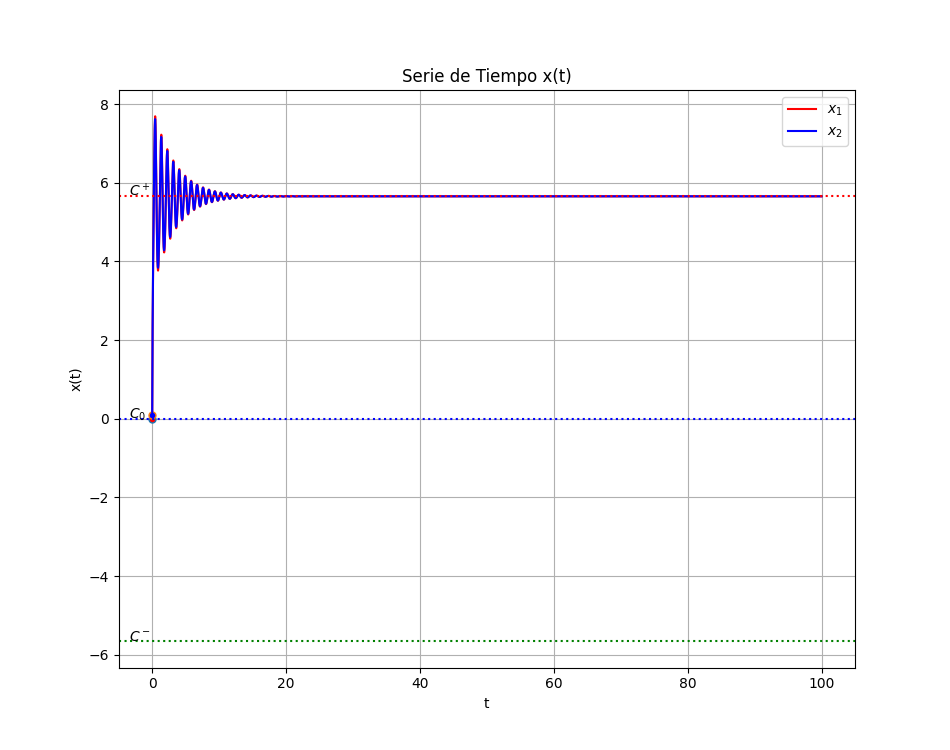

interactive(children=(FloatSlider(value=10.0, description='s', max=50.0), FloatSlider(value=13.0, description=…

In [10]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

@widgets.interact(s=(0, 50, 0.1),r=(0, 40 ,0.01), b=(0, 10, 0.01),variable=['X','Y','Z'],n=(2, 1000, 1.))

def update(s=10, r=13, b=float(8)/float(3),variable='X',n = 100):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)        
        
    params = np.array([s,r,b])
    dt=0.005  # paso de integracion numerica

    X1,T1 = EulerND(lorenz,x1,0,n,dt,params)
    X2,T2 = EulerND(lorenz,x2,0,n,dt,params)
    
    C0,C1,C2 = PtosEquilibrio(s,r,b)

    if (variable=='X'):
        
        plt.plot([T1[0]], [x1[0]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.plot(T1,X1[0],label=r'$x_1$', color='red')
        plt.plot([T2[0]], [x2[0]], markerfacecolor='b', marker='o', markersize=5, alpha=1)
        plt.plot(T2,X2[0],label=r'$x_2$', color='blue')
        
        plt.title("Serie de Tiempo x(t)")
        plt.xlabel('t')
        plt.ylabel('x(t)')
        plt.axhline(C0[0], linestyle=':', color='blue')
        ax.text(-3.5,C0[0],r'$C_0$')  
        plt.axhline(C1[0], linestyle=':', color='red')
        ax.text(-3.5,C1[0],r'$C^+$')  
        plt.axhline(C2[0], linestyle=':', color='green')
        ax.text(-3.5,C2[0],r'$C^-$')  
        
    elif (variable=='Y'):
        
        plt.plot([T1[1]], [x1[1]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.plot(T1,X1[1],label=r'$x_1$', color='red')
        plt.plot([T2[1]], [x2[1]], markerfacecolor='b', marker='o', markersize=5, alpha=1)
        plt.plot(T2,X2[1],label=r'$x_2$', color='blue')
        
        plt.title("Serie de Tiempo y(t)")
        plt.xlabel('t')
        plt.ylabel('y(t)')
        plt.axhline(C0[1], linestyle=':', color='blue')
        ax.text(-3.5,C0[1],r'$C_0$')  
        plt.axhline(C1[1], linestyle=':', color='red')
        ax.text(-3.5,C1[1],r'$C^+$')  
        plt.axhline(C2[1], linestyle=':', color='green')
        ax.text(-3.5,C2[1],r'$C^-$')  
        
    elif (variable=='Z'):
        
        plt.plot([T1[2]], [x1[2]], markerfacecolor='r', marker='o', markersize=5, alpha=1)
        plt.plot(T1,X1[2],label=r'$x_1$', color='red')
        plt.plot([T2[2]], [x2[2]], markerfacecolor='b', marker='o', markersize=5, alpha=1)
        plt.plot(T2,X2[2],label=r'$x_2$', color='blue')
        
        plt.title("Serie de Tiempo z(t)")
        plt.xlabel('t')
        plt.ylabel('z(t)')
        plt.axhline(C0[2], linestyle=':', color='blue')
        ax.text(-3.5,C0[2],r'$C_0$')  
        plt.axhline(C1[2], linestyle=':', color='red')
        ax.text(-3.5,C1[2],r'$C^+$')  
        plt.axhline(C2[2], linestyle=':', color='green')
        ax.text(-3.5,C2[2],r'$C^-$')  
        
        
        
    rH = float(s*(s+b+3))/float(s-b-1)
    print("rH = ",rH)
    plt.legend()


In [11]:
def CalcDelta(X1,X2):
    delta = []
    for t in range(len(X1)):
        d = np.log(abs(X1[t]-X2[t]))
        delta.append(d)
        
    return delta
    

<IPython.core.display.Javascript object>


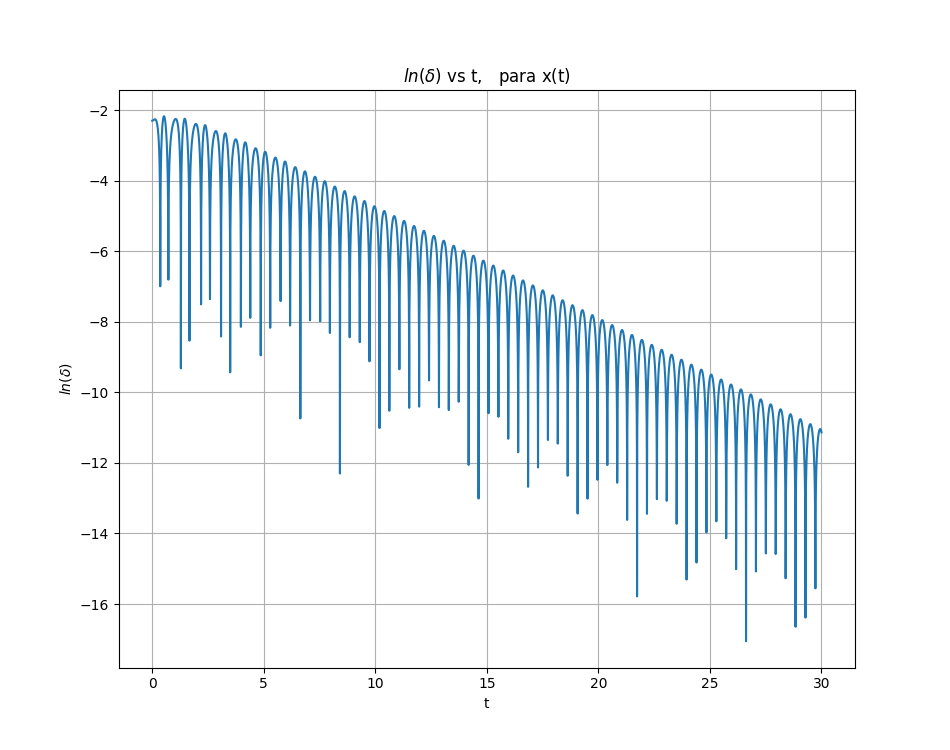

interactive(children=(FloatSlider(value=10.0, description='s', max=50.0), FloatSlider(value=13.0, description=…

In [13]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

@widgets.interact(s=(0, 50, 0.1),r=(0, 40 ,0.01), b=(0, 10, 0.01),variable=['X','Y','Z'],n=(2, 100, 1.))

def update(s=10, r=13, b=float(8)/float(3),variable='X',n = 30):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)        
        
    params = np.array([s,r,b])
    dt=0.005  # paso de integracion numerica

    X1,T1 = EulerND(lorenz,x1,0,n,dt,params)
    X2,T2 = EulerND(lorenz,x2,0,n,dt,params)
    

    if (variable=='X'):        
        delta = CalcDelta(X1[0],X2[0])               
        plt.title("$ln(\delta)$ vs t,   para x(t)")
        
    elif (variable=='Y'):        
        delta = CalcDelta(X1[1],X2[1])       
        plt.title("$ln(\delta)$ vs t,   para y(t)")
        
    elif (variable=='Z'):
        
        delta = CalcDelta(X1[2],X2[2])        
        plt.title("$ln(\delta)$ vs t,   para z(t)")
        
    plt.plot(T1,delta)
#     plt.plot(T1,delta,'r.')

    plt.xlabel('t')
    plt.ylabel('$ln(\delta)$')        
        
        
        
    rH = float(s*(s+b+3))/float(s-b-1)
    print("rH = ",rH)
#     plt.legend()

### Definición de Caos:

1.

2.

3.


### El pendulo doble.

fdsfdsf

### El *mapeo* de Lorenz

fdsfdsf

In [14]:
def CalculaPicos(T,X):
    
    Zn = []
    Tn = []
    
    for i in range(len(X)):
        if (i > 0 and i < len(X)-1):
            if (X[i] >= X[i-1] and X[i] >= X[i+1]):
                Zn.append(X[i])
                Tn.append(T[i])
                
    return Zn,Tn
                    

def MapeoLorenzTS(T,X):

    Zn,Tn = CalculaPicos(T,X)
                    
    plt.plot(T,X)                
    plt.plot(Tn,Zn,'ro')   


<IPython.core.display.Javascript object>


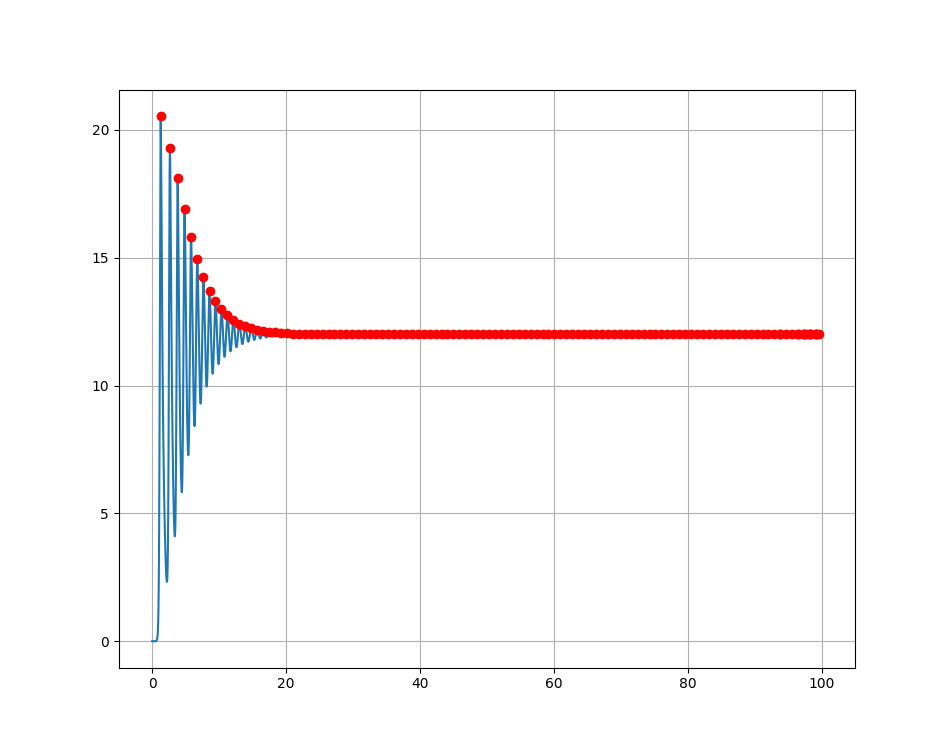

interactive(children=(FloatSlider(value=10.0, description='s', max=50.0), FloatSlider(value=13.0, description=…

In [15]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)



@widgets.interact(s=(0, 50, 0.1),r=(0, 40 ,0.01), b=(0, 10, 0.01),n=(2, 300, 1.))

def update(s=10, r=13, b=2.667,n=100):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)        
        
    params = np.array([s,r,b])
    dt=0.005  # paso de integracion numerica

    X,T = EulerND(lorenz,x0,0,n,dt,params)
    MapeoLorenzTS(T,X[2])
    
    rH = float(s*(s+b+3))/float(s-b-1)
    print("rH = ",rH)    

In [16]:
def MapeoLorenz(T,X):

    Zn,Tn = CalculaPicos(T,X)

    Zn1 = list(Zn)
    Zn1.pop(0)
    Zn.pop(len(Zn)-1)

    plt.plot(Zn,Zn1,'go')
    l = arange(min(Zn)-0.5,max(Zn)+1)
    plt.plot(l,l, linestyle='-', color='black')
    plt.xlim(min(Zn)-0.5,max(Zn)+0.5)
    plt.ylim(min(Zn)-0.5,max(Zn)+0.5)
    

<IPython.core.display.Javascript object>


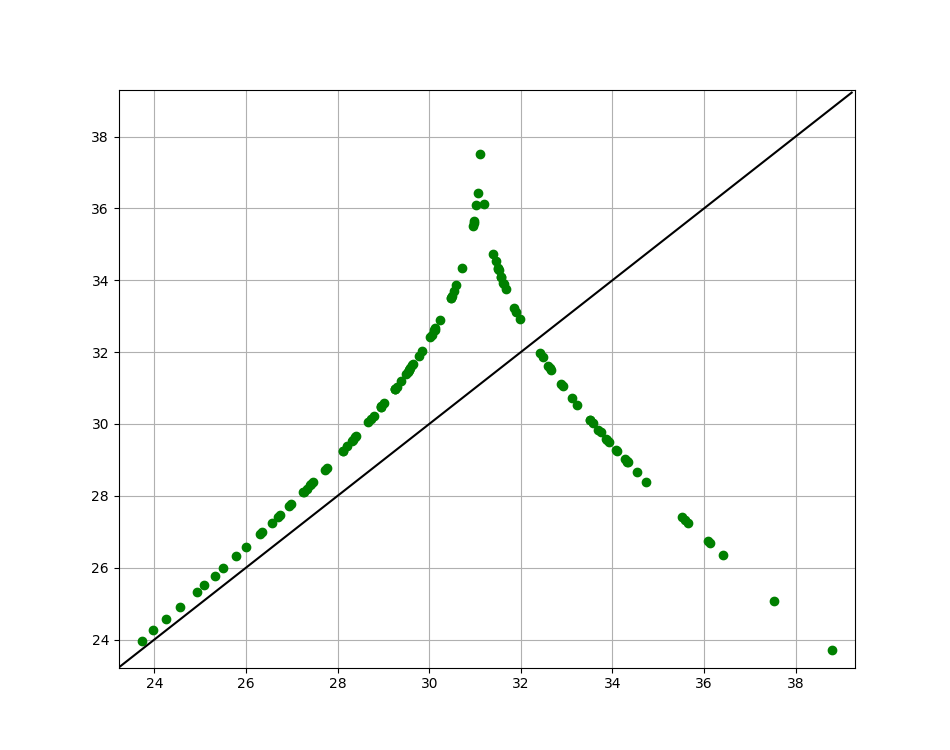

interactive(children=(FloatSlider(value=10.0, description='s', max=50.0), FloatSlider(value=13.0, description=…

In [17]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)

@widgets.interact(s=(0, 50, 0.1),r=(0, 30 ,0.01), b=(0, 10, 0.01),n=(2, 300, 1.))


def update(s=10, r=13, b=2.667,n=100):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.grid(True)        
        
    params = np.array([s,r,b])
    dt=0.005  # paso de integracion numerica
        
    X,T = EulerND(lorenz,x0,0,n,dt,params)

    MapeoLorenz(T,X[2])
    
    rH = float(s*(s+b+3))/float(s-b-1)
    print("rH = ",rH)    

## 3.2 Caos Determinista en Mapeos Unidimencionales

### El Mapeo Logistico

In [19]:
def Logistico(r,x):
    return r*x*(1-x) 

<IPython.core.display.Javascript object>


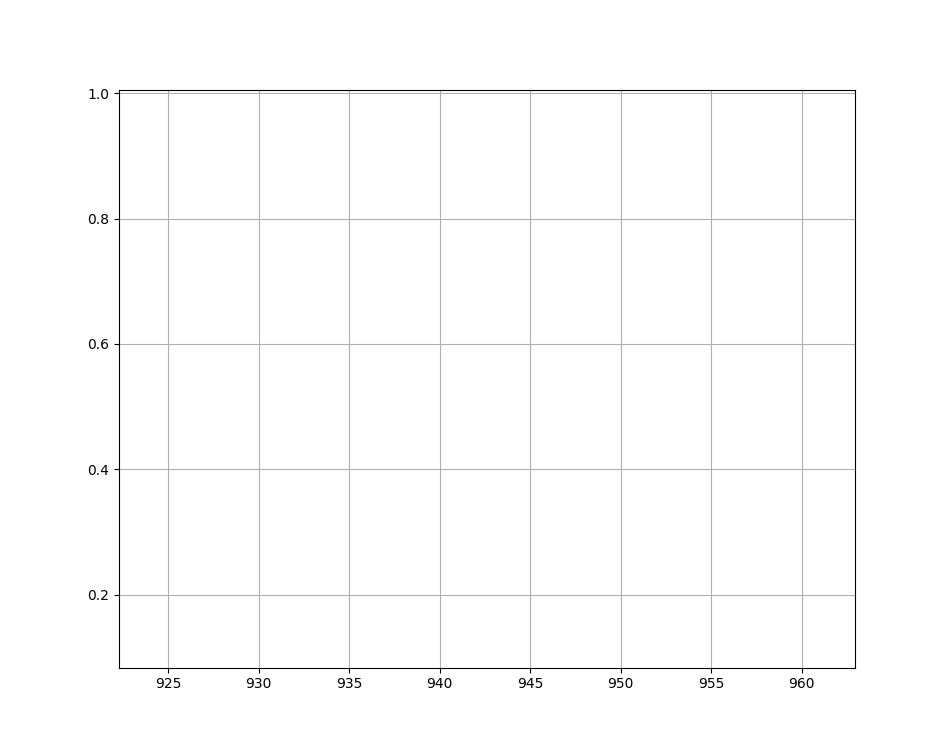

interactive(children=(FloatSlider(value=0.8, description='x0', max=1.0, step=0.01), FloatSlider(value=3.54, de…

In [93]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_ylim([-0.1, 1.1])
ax.grid(True)

@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01),n=(50, 1000, 10))
def update(x0=0.8,r = 3.54,n = 150):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()


    X=[]
# Y=[]

    x = x0
    X.append(x)

    for i in range(1,n):

        x = Logistico(r,x)
        X.append(x)


    plt.plot(X,'r.')
    plt.plot(x0,'bo')
    plt.plot(X)
    #plot(Y) 

Ahora con dos condiciones iniciales diferentes!

<IPython.core.display.Javascript object>


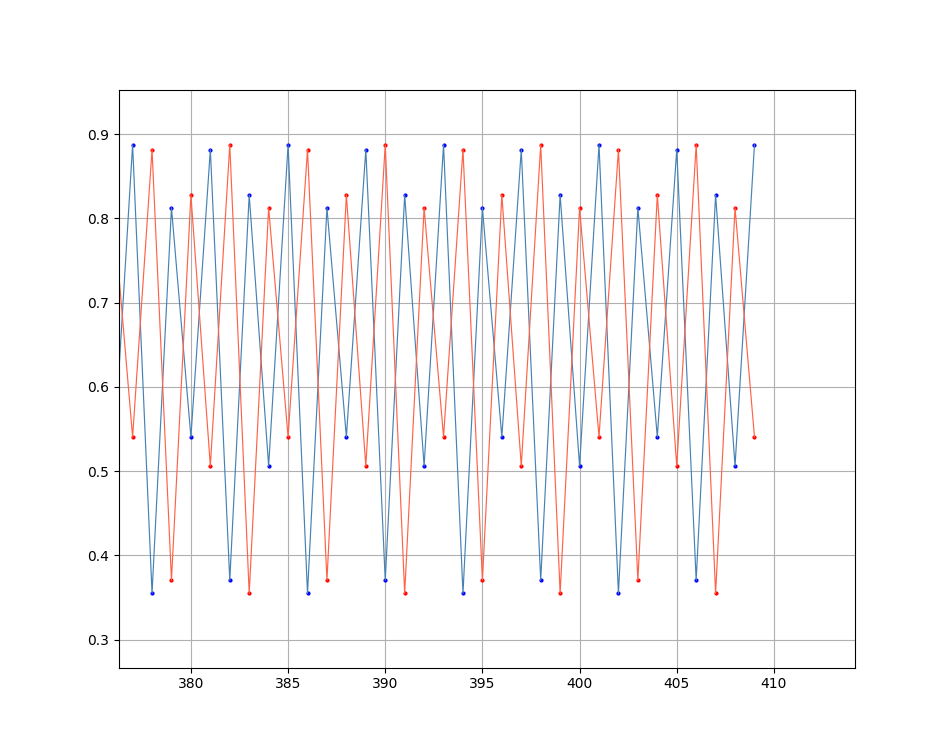

interactive(children=(FloatSlider(value=0.33, description='x0', max=1.0, step=0.01), FloatSlider(value=0.9, de…

In [67]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_ylim([-0.1, 1.1])
ax.grid(True)

@widgets.interact(x0=(0, 1, 0.01),y0=(0, 1, 0.01),r=(0, 4, 0.01),n=(50, 1000, 10))


def update(x0=0.33,y0=0.9,r = 3., n = 150):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.set_ylim([-0.1, 1.1])
    ax.grid(True)   
    
    
    X=[]
    Y=[]

    x = x0
    y = y0
    
    X.append(x)
    Y.append(y)

    for i in range(1,n):

        x = Logistico(r,x)
        X.append(x)
        
        y = Logistico(r,y)
        Y.append(y)        


    plt.plot(X,'bo', markersize=2)
    plt.plot(x0,'bo')
    plt.plot(X, color = 'steelblue', lw=0.85)
    
    plt.plot(Y,'ro', markersize=2)
    plt.plot(y0,'ro')
    plt.plot(Y, color = 'tomato', lw=0.85)   


Tecnica de iteración de Teleraña (Coweb)

<IPython.core.display.Javascript object>


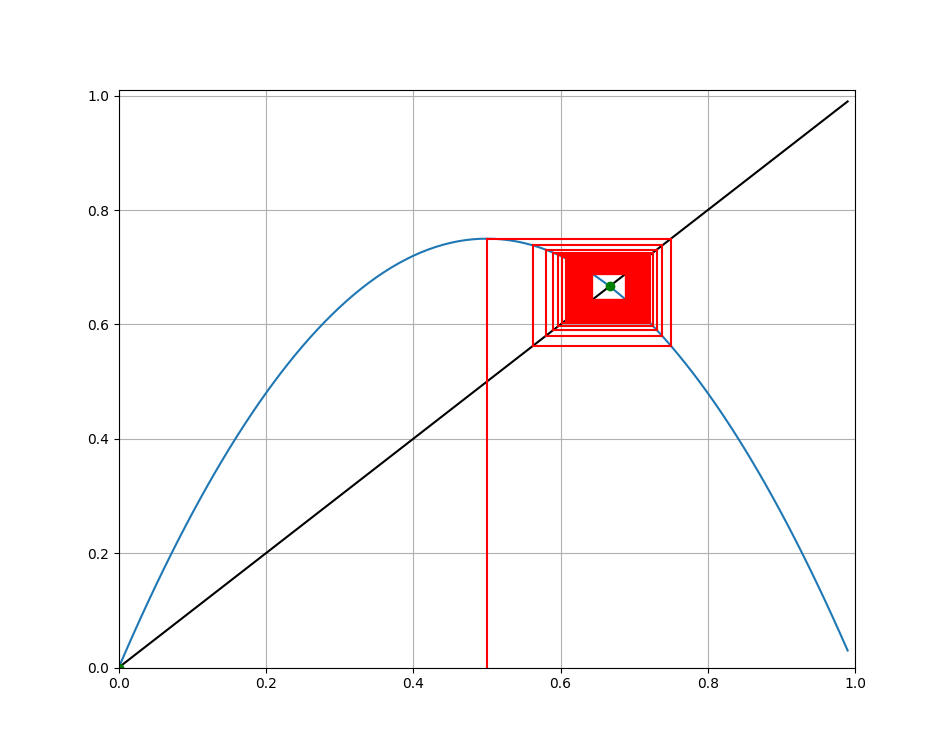

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0, step=0.01), FloatSlider(value=3.0, des…

In [112]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01)) 
def update(x0=0.5,r = 3.):
    
    n = 100
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    plt.plot(T,r*T*(1-T) ) 
    
    plt.plot(0.,0.,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')    

    x = x0
        
    if x0 < eqx:
        
        xV = [0, x0]        
        yV = [x0, x0]       
        plt.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,x0), 0]        
        plt.plot(xV, yV, color='red')   
 
    
    
    for i in range(1,n):       
        
        if x == x0:            
            if x0 < eqx:
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,x)
#         X.append(x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

Iterando el mapeo aplicado dos veces $f^2(x) = f(f(x))$

<IPython.core.display.Javascript object>


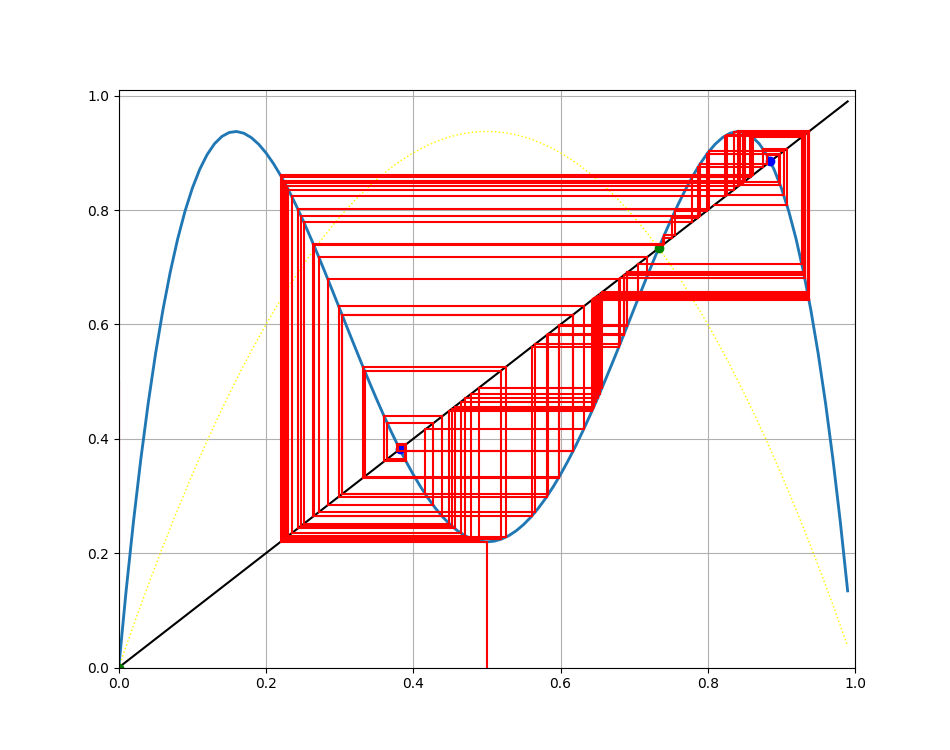

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0, step=0.01), FloatSlider(value=3.75, de…

In [113]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01)) 
# def update(x0=0.8,r = 2.8):
def update(x0=0.5,r = 3.75):
    
    n = 100
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    f1 = r*T*(1-T)
    
    plt.plot(T,r*T*(1-T), color="yellow", linestyle=':', linewidth=1.05 ) 
    plt.plot(T,r*f1*(1-f1), linewidth=2.05 ) 
    
    plt.plot(0.,0,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')    
    
    
    Peq= float(r+1+sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Peq,Logistico(r,Logistico(r,Peq)),'bo')
    
    Qeq= float(r+1-sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Qeq,Logistico(r,Logistico(r,Qeq)),'bo')      
    

    x = x0
        
#     if x0 < eqx:
        
#         xV = [0, x0]        
#         yV = [x0, x0]       
#         plt.plot(yV, xV, color='red')   

    if ((x0 > Peq) and (x0 < eqx)):
        
        xV = [0, Logistico(r,x0)]        
        yV = [x0, x0]       
        plt.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,Logistico(r,x0)), 0]        
        plt.plot(xV, yV, color='red')   
        
        
#     xV = [x0,x0]    
#     yV = [Logistico(r,Logistico(r,x0)), 0]        
#     plt.plot(xV, yV, color='red')           

    
    
    for i in range(1,n):       
        
        if x == x0:            
#             if x0 < eqx:
            if ((x0 > Peq) and (x0 < eqx)):
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,Logistico(r,x))
#         X.append(x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

Ahora iteremos el mapeo aplicado 3 veces $f^3(x)$

<IPython.core.display.Javascript object>


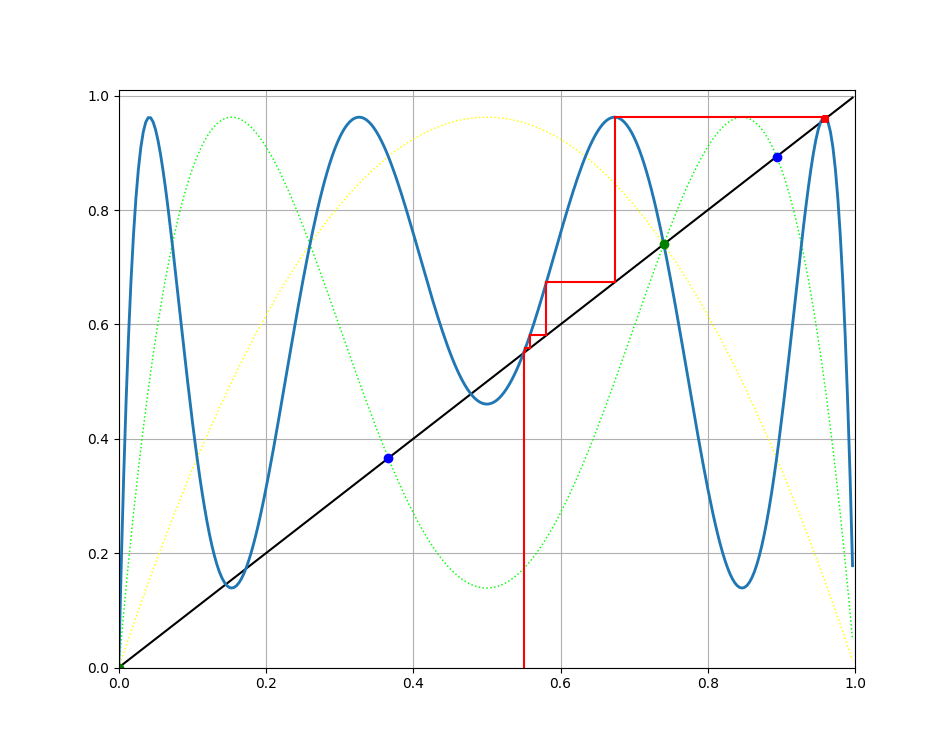

interactive(children=(FloatSlider(value=0.55, description='x0', max=1.0, step=0.01), FloatSlider(value=3.85, d…

In [116]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01)) 

# def update(x0=0.0,r = 3.92):

def update(x0=0.55,r = 3.85):
# def update(x0=0.0,r = 3.87):
    
    n = 300
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    f1 = r*T*(1-T)
    f2 = r*f1*(1-f1)
    
    
    plt.plot(T,r*T*(1-T), color="yellow", linestyle=':', linewidth=1.05 ) 
    plt.plot(T,r*f1*(1-f1), color="lime", linestyle=':',  linewidth=1.05 )     
    plt.plot(T,r*f2*(1-f2) , linewidth=2.05 ) 
    
    plt.plot(0.0,0.0,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')   
    
    Peq= float(r+1+sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Peq,Logistico(r,Logistico(r,Peq)),'bo')
    
    Qeq= float(r+1-sqrt((r-3)*(r+1)))/float(2*r)    
    plt.plot(Qeq,Logistico(r,Logistico(r,Qeq)),'bo')      
    
    
    x = x0
        
    if ((x0 > Peq) and (x0 < eqx)):
        
        xV = [0, Logistico(r,Logistico(r,x0))]        
        yV = [x0, x0]       
        plt.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,Logistico(r,Logistico(r,x0))), 0]        
        plt.plot(xV, yV, color='red')   
 
    
    
    for i in range(1,n):       
        
        if x == x0:            
            if ((x0 > Peq) and (x0 < eqx)):
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,Logistico(r,Logistico(r,x)))
#         X.append(x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

<IPython.core.display.Javascript object>


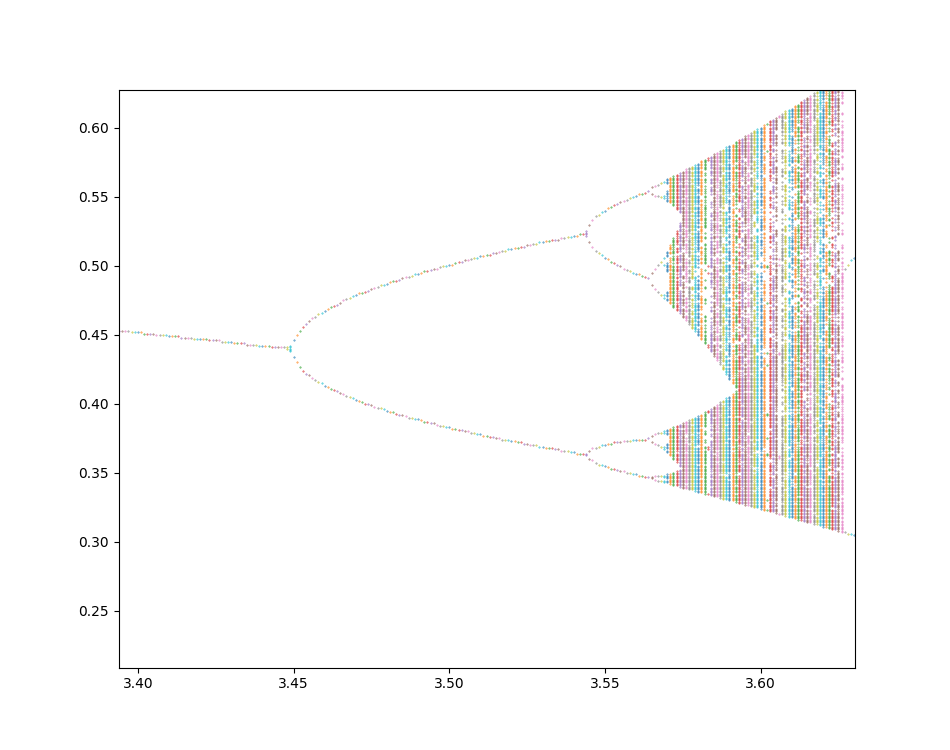

In [70]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))

x0=0.5
n=1000
# itSbl=1000
itSbl=1000


for r in np.arange(2.9, 4., 0.001):
# for r in np.arange(0. , 4., 0.001):
    
    R=[]
    X=[]    
    
    R.append(r)
    xn=x0

    for i in range(0,n):
        xn=Logistico(r,xn)

#     X.append(xn)
    X.append(round(xn,3))    
    
    
    for i in range(1,itSbl):
        xn=Logistico(r,xn)
        
        if round(xn,3) not in X:          
#             X.append(xn)
            X.append(round(xn,3))
            R.append(r)       
        
    plt.plot(R,X,'.', markersize=.75)
#     plt.plot(R,X,'o', markersize=.5)    

Calculando el exponente de Lyapunov para el mapeo Logistico.

In [85]:
def derivadaLogistico(r,x):
    return r*(1-2*x)

<IPython.core.display.Javascript object>


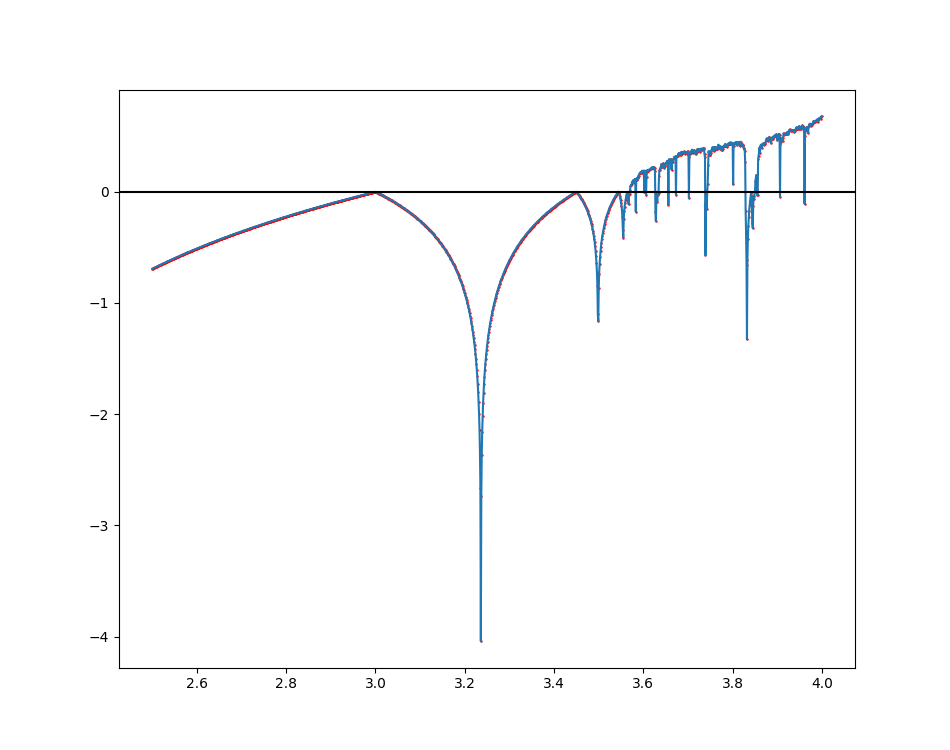

[2.9959999999999454, 2.9969999999999453, 2.997999999999945, 2.998999999999945, 2.999999999999945, 3.000999999999945, 3.0019999999999447, 3.4479999999998956, 3.4489999999998955, 3.4499999999998954, 3.542999999999885, 3.543999999999885, 3.563999999999883, 3.6019999999998786, 3.742999999999863, 3.8489999999998514]


In [86]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))

x0=0.5
n=1000
# itSbl=100
itSbl=1000


R=[]
X=[]
Alpha=[]
Rb=[]
    

# for r in arange(0.01 , 4., 0.001):
for r in np.arange(2.5 , 4., 0.001):
# for r in arange(2.9 , 4., 0.0001):
    
    
    suma = 0
    alpha = 0
    tot = n + itSbl    
    
    xn=x0
    xd=x0

    for i in range(0,n):
        xn=Logistico(r,xn)
  
    for i in range(1,itSbl):
        
        xn=Logistico(r,xn)
        
        xd=derivadaLogistico(r,xn)
        suma=suma+np.log(abs(xd))
            

    
    alpha = float(suma)/float(itSbl)
    Alpha.append(alpha)
    R.append(r)
    
#     print(alpha, ',  r = ', r)
    
    
    if (round(alpha,2) == 0):
        Rb.append(r)
        
                    
 
plt.plot(R,Alpha,'ro', markersize=.75)
plt.plot(R,Alpha)       
plt.axhline(0, color='black')

print(Rb)


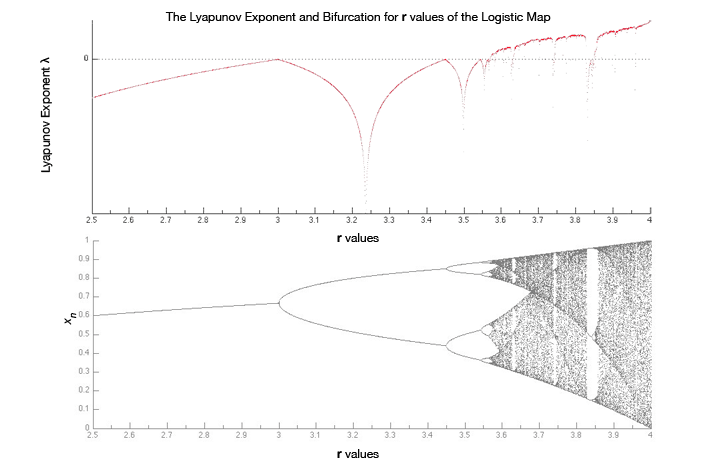